In [62]:
import warnings 
warnings.filterwarnings(action='ignore')

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("claimants.csv")
df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ATTORNEY  1340 non-null   int64  
 1   CLMSEX    1328 non-null   float64
 2   CLMINSUR  1299 non-null   float64
 3   SEATBELT  1292 non-null   float64
 4   CLMAGE    1151 non-null   float64
 5   LOSS      1340 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 62.9 KB


In [66]:
df.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [67]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [68]:
df['CLMSEX']=df['CLMSEX'].fillna(df['CLMAGE'].mean())
df['CLMINSUR']=df['CLMINSUR'].fillna(df['CLMINSUR'].mean())
df['SEATBELT']=df['SEATBELT'].fillna(df['SEATBELT'].mean())
df['CLMAGE']=df['CLMAGE'].fillna(df['CLMAGE'].mean())

In [69]:
df.corr()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,1.000000,-0.014371,0.078221,-0.056158,0.009886,-0.219715
CLMSEX,-0.014371,1.000000,0.034805,-0.012127,-0.016755,-0.015742
CLMINSUR,0.078221,0.034805,1.000000,0.020899,0.046255,0.005810
SEATBELT,-0.056158,-0.012127,0.020899,1.000000,-0.026234,0.111031
CLMAGE,0.009886,-0.016755,0.046255,-0.026234,1.000000,0.057641
LOSS,-0.219715,-0.015742,0.005810,0.111031,0.057641,1.000000


In [70]:
df.cov()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
ATTORNEY,0.250061,-0.019198,0.011156,-0.003569,0.093020,-1.168687
CLMSEX,-0.019198,7.136151,0.026517,-0.004117,-0.842233,-0.447306
CLMINSUR,0.011156,0.026517,0.081340,0.000757,0.248232,0.017625
SEATBELT,-0.003569,-0.004117,0.000757,0.016150,-0.062735,0.150090
CLMAGE,0.093020,-0.842233,0.248232,-0.062735,354.078656,11.537022
LOSS,-1.168687,-0.447306,0.017625,0.150090,11.537022,113.143709


In [71]:
df.drop(['CLMSEX','SEATBELT'],axis=1,inplace=True)


In [72]:
x= df.drop(['ATTORNEY'],axis=1)
y=df['ATTORNEY']

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123456)

In [74]:
def create_naive_bayes_model():
    from sklearn.naive_bayes import GaussianNB 
    model=GaussianNB()
    model.fit(x_train,y_train)
    return model

In [75]:
def create_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(x_train, y_train)
    return model

In [76]:
def create_svm_model():
    from sklearn.svm import SVC
    model = SVC(C=100)
    model.fit(x_train, y_train)
    return model

In [92]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_model(model):
    y_pred = model.predict(x_test)

    # evaluate the model using following metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average='micro')
    recall = recall_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')

    return f"{accuracy:.2f}" ,f"{precision:.2f}",f"{recall:.2f}",f"{f1:.2f}"

In [93]:
# list to keep all models
models =[]
#create all the models
models.append({"name" : "naive bayes",'model':create_naive_bayes_model() })
models.append({"name" : "KNN",'model':create_knn_model()})
models.append({"name" : "SVM",'model':create_svm_model()})


In [ ]:
#get the model evaluated
for model_info in models:
    accuracy,precision,recall,f1=evaluate_model(model_info['model'])
    #keep the metrics
    model_info['accuracy'] = accuracy
    model_info['precision'] = precision
    model_info['recall'] = recall
    model_info['f1'] = f1
    

In [95]:
evaluation_df = pd.DataFrame(models,columns=['name','accuracy','precision','recall','f1'])
evaluation_df

,name,accuracy,precision,recall,f1
0,naive bayes,0.54,0.54,0.54,0.54
1,KNN,0.67,0.67,0.67,0.67
2,SVM,0.69,0.69,0.69,0.69


In [108]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
def evaluate_model(model):
    y_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train,y_pred)
    precision = precision_score(y_train,y_pred)
    recll = recall_score(y_train,y_pred)
    f1 = f1_score(y_train,y_pred)

    return f'{accuracy:.2f}',f'{precision:.2f}',f'{recll:.2f}',f'{f1:.2f}'

In [109]:
# list to keep all models
models =[]
#create all the models
models.append({"name" : "naive bayes",'model':create_naive_bayes_model() })
models.append({"name" : "KNN",'model':create_knn_model()})
models.append({"name" : "SVM",'model':create_svm_model()})


In [110]:
for model in models:
    accuracy, precision, recall, f1 = evaluate_model(model['model'])
    model['accuracy'] = accuracy
    model['precision'] = precision
    model['recall'] = recall
    model['f1'] = f1 

evaluation_df = pd.DataFrame(models,columns=['name','accuracy','precision','recall','f1'])    
evaluation_df
    

,name,accuracy,precision,recall,f1
0,naive bayes,0.56,0.53,0.92,0.67
1,KNN,0.76,0.74,0.79,0.77
2,SVM,0.70,0.67,0.79,0.72


In [ ]:
def visualize(model):
    y_pred_vis = model['model'].predict(x_test)
    plt.scatter(x_test['CLMINSUR'][y_pred_vis==0],x_test['LOSS'][y_pred_vis==0], color='purple', label='Yes')
    plt.scatter(x_test['CLMINSUR'][y_pred_vis==1],x_test['LOSS'][y_pred_vis==1], color='black', label='No')
    plt.xlabel('Clminsur')
    plt.ylabel('Loss')
    plt.title('To give Attorney')
    plt.legend()

In [121]:
def visulalize(model):
    y_pred = model['model'].predict(x_test)
    plt.scatter(x_test['CLMINSUR'][y_pred==0],x_test['LOSS'][y_pred==0], color = 'pink',label='yes')
    plt.scatter(x_test['CLMINSUR'][y_pred==1],x_test['LOSS'][y_pred==1],color = 'black',label='no')
    plt.xlabel("CLMINSUR")
    plt.ylabel("Loss")
    plt.title("To get Attorney")
    plt.legend()
    
    

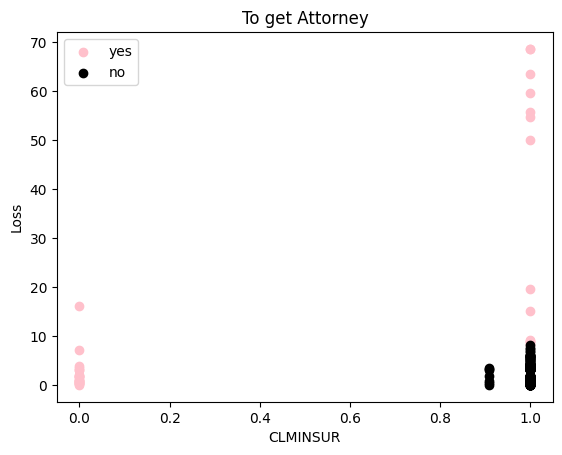

In [122]:
visulalize(models[0])

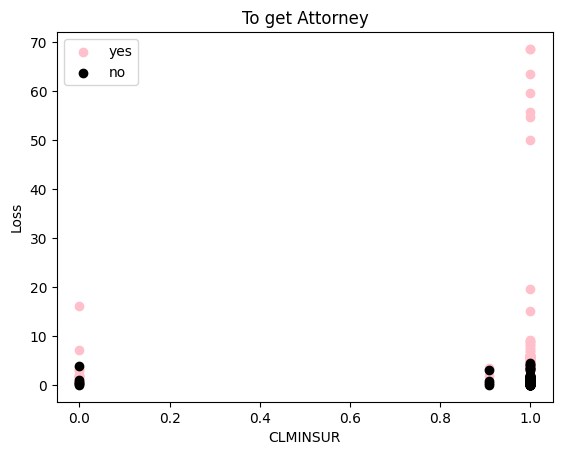

In [123]:
visulalize(models[1])

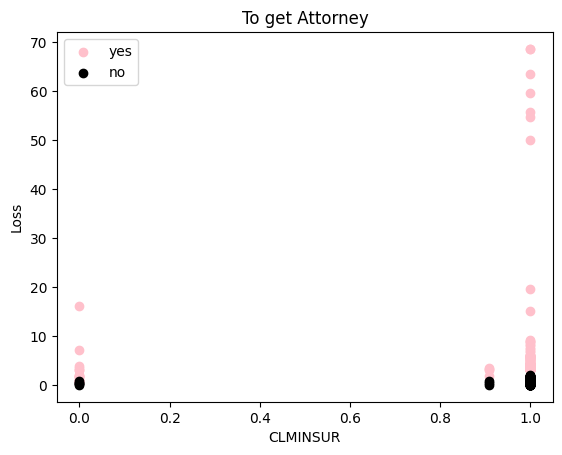

In [124]:
visulalize(models[2])
